In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, stdev, median
import seaborn as sns
from scipy import stats


In [ ]:
#1257.4986072423399
#1253.6731382585315

In [3]:
prefix = '../../experiments/bc/presentation_big_ship_2020_pass_wind_tide_10S_256_6lr#[512,256,128,64,32]-steps30-seed5/steps30#[512,256,128,64,32]#seed5.csv'
title = 'BC_5epochs_256,128,64neurons'


run = pd.read_csv(prefix)

run["mean_distance"] = 0
for i in range(0, len(run["distances"])):
    # hacky way to convert strings that represent list back to true lists of floats
    run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
    run["mean_distance"][i] = mean(run["distances"][i])
    

mean_dists = run["mean_distance"]

print(mean(mean_dists))
print(stdev(mean_dists))
print(median(mean_dists))
print(stats.median_abs_deviation(mean_dists))

/tmp/ipykernel_8364/126616516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["distances"][i] = list(map(float, run["distances"][i].replace('[', '').replace(']','').split(',')))
/tmp/ipykernel_8364/126616516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run["mean_distance"][i] = mean(run["distances"][i])


1036.2937803264226
1243.7060166824683
428
274.0


In [20]:
run

,Unnamed: 0,id,ep_length,cum_reward,performance,distances,mean_distance
0,0,1,177,160.643845,0.907592,"[6.638721305856247, 12.669527966704836, 15.184...",739
1,1,2,226,206.124780,0.912057,"[1.4030817720771809, 2.8104385285968156, 4.448...",703
2,2,3,44,41.978669,0.954061,"[11.075259308435081, 15.065992228073753, 13.46...",367
3,3,4,78,72.452493,0.928878,"[1.2180805597023612, 1.8452068197857896, 4.131...",568
4,4,5,61,60.361276,0.989529,"[1.874797823768737, 4.968549660525642, 9.09853...",83
...,...,...,...,...,...,...,...
1702,1702,1703,70,67.817568,0.968822,"[7.884686960672131, 19.96376634801969, 28.2021...",249
1703,1703,1704,48,46.257832,0.963705,"[3.890629421423612, 8.84143129291237, 14.94272...",290
1704,1704,1705,488,327.716195,0.671550,"[3.5889023560049123, 6.617422049955281, 9.1152...",2627
1705,1705,1706,289,271.419389,0.939167,"[1.978206243776117, 3.7413497554483652, 5.7101...",486


In [10]:
time_elems = []

In [11]:
print("LESS THAN 10 minutes; MEAN STDEV MEDIAN MAD")
less_10min = run[run['ep_length'] < 60]['mean_distance']
time_elems.append(less_10min)
print(mean(less_10min))
print(stdev(less_10min))
print(median(less_10min))
print(stats.median_abs_deviation(less_10min))



LESS THAN 10 minutes; MEAN STDEV MEDIAN MAD
237.97564102564104
225.9946792322968
170.0
71.0


In [12]:
print(">= 10 < 20; MEAN STDEV MEDIAN MAD")
less_20min = run[(run['ep_length'] >= 60) & (run['ep_length'] < 120)]['mean_distance']
time_elems.append(less_20min)
print(mean(less_20min))
print(stdev(less_20min))
print(median(less_20min))
print(stats.median_abs_deviation(less_20min))

>= 10 < 20; MEAN STDEV MEDIAN MAD
410.5751748251748
449.43691130794866
259.0
134.5


In [13]:
print(">= 20 < 30; MEAN STDEV MEDIAN MAD")
less_30min = run[(run['ep_length'] >= 120) & (run['ep_length'] < 180)]['mean_distance']
time_elems.append(less_30min)
print(mean(less_30min))
print(stdev(less_30min))
print(median(less_30min))
print(stats.median_abs_deviation(less_30min))

>= 20 < 30; MEAN STDEV MEDIAN MAD
1430.4491978609626
1196.3024626250196
944
545.0


In [14]:
print(">= 30 < 40; MEAN STDEV MEDIAN MAD")
less_40min = run[(run['ep_length'] >= 180) & (run['ep_length'] < 240)]['mean_distance']
time_elems.append(less_40min)
print(mean(less_40min))
print(stdev(less_40min))
print(median(less_40min))
print(stats.median_abs_deviation(less_40min))

>= 30 < 40; MEAN STDEV MEDIAN MAD
1683.4689265536724
1124.861122940941
1382
914.0


In [15]:
print(">= 40 < 50; MEAN STDEV MEDIAN MAD")
less_50min = run[(run['ep_length'] >= 240) & (run['ep_length'] < 300)]['mean_distance']
time_elems.append(less_50min)
print(mean(less_50min))
print(stdev(less_50min))
print(median(less_50min))
print(stats.median_abs_deviation(less_50min))

>= 40 < 50; MEAN STDEV MEDIAN MAD
2101.938271604938
1574.401223817246
1737.5
854.5


In [16]:
print(">= 50 < 60; MEAN STDEV MEDIAN MAD")
less_60min = run[(run['ep_length'] >= 300) & (run['ep_length'] < 360)]['mean_distance']
time_elems.append(less_60min)
print(mean(less_60min))
print(stdev(less_60min))
print(median(less_60min))
print(stats.median_abs_deviation(less_60min))

>= 50 < 60; MEAN STDEV MEDIAN MAD
2130.4375
1790.2226736592809
1645.5
667.0


In [17]:
print("> 60; MEAN STDEV MEDIAN MAD")
more_60min = run[run['ep_length'] >= 360]['mean_distance']
time_elems.append(more_60min)
print(mean(more_60min))
print(stdev(more_60min))
print(median(more_60min))
print(stats.median_abs_deviation(more_60min))

> 60; MEAN STDEV MEDIAN MAD
2090.367132867133
793.8770474669919
1978.5
449.5


237.97564102564104
410.5751748251748
1430.4491978609626
1683.4689265536724
2101.938271604938
2130.4375
2090.367132867133


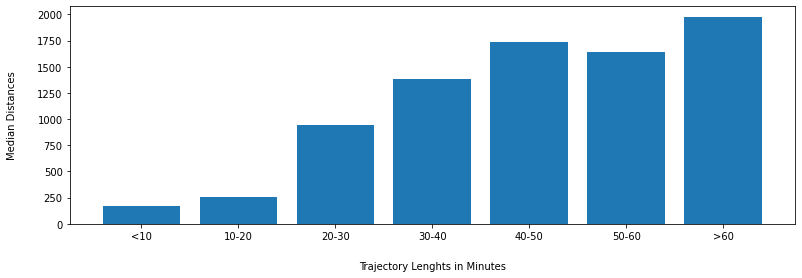

In [19]:
for e in time_elems:
    print(mean(e))

labels = ['<10', '10-20' ,'20-30' , '30-40','40-50', '50-60', '>60' ]
plt.figure(figsize=(13,4))
plt.bar(labels, [median(e) for e in time_elems])
plt.ylabel("Median Distances", labelpad=20)
plt.xlabel("Trajectory Lenghts in Minutes", labelpad=20)
#plt.savefig(f'press_pass.svg', format="svg", bbox_inches='tight')

<AxesSubplot:xlabel='mean_distance', ylabel='Count'>

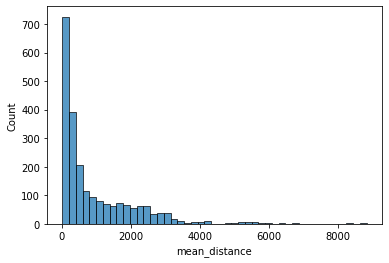

In [14]:
sns.histplot(x=mean_dists)

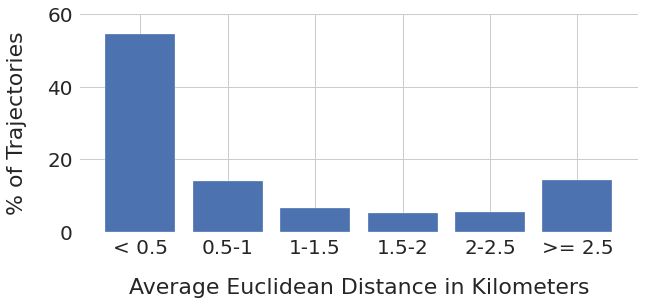

In [4]:
labels = ['< 0.5', '0.5-1' ,'1-1.5' , '1.5-2','2-2.5', '>= 2.5' ]
n_trajs = []

all = len(mean_dists)
n_trajs.append(len(mean_dists[mean_dists < 500]) / all * 100)
n_trajs.append(len(mean_dists[(mean_dists >= 500) & (mean_dists <= 999)]) / all * 100 )
n_trajs.append(len(mean_dists[(mean_dists >= 1000) & (mean_dists <= 1499)]) / all* 100)
n_trajs.append(len(mean_dists[(mean_dists >= 1500) & (mean_dists <= 1999)]) / all* 100)
n_trajs.append(len(mean_dists[(mean_dists >= 2000) & (mean_dists <= 2499)]) / all* 100)
n_trajs.append(len(mean_dists[mean_dists > 2499]) / all* 100)

plt.figure(figsize=(10,4))
plt.style.use('seaborn')
sns.set_style("whitegrid")
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.bar(labels,n_trajs)
plt.ylabel("% of Trajectories", labelpad=20)
plt.xlabel("Average Euclidean Distance in Kilometers", labelpad=20)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
plt.ylim(0, 60)
#plt.draw()
#_NO_LABELS
plt.savefig(f'press_hist.svg', format="svg", bbox_inches='tight')

In [6]:
print(mean(mean_dists))
print(stdev(mean_dists))
print(median(mean_dists))

922.4909197422378
1181.061935129862
437.0


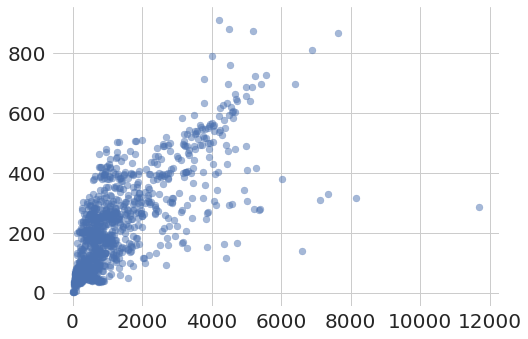

In [7]:
a = runs[0][(runs[0]["mean_distance"] < 150) & (runs[0]["ep_length"] < 150)]
plt.scatter(runs[0]["mean_distance"], runs[0]["ep_length"], alpha=0.5)
plt.show()

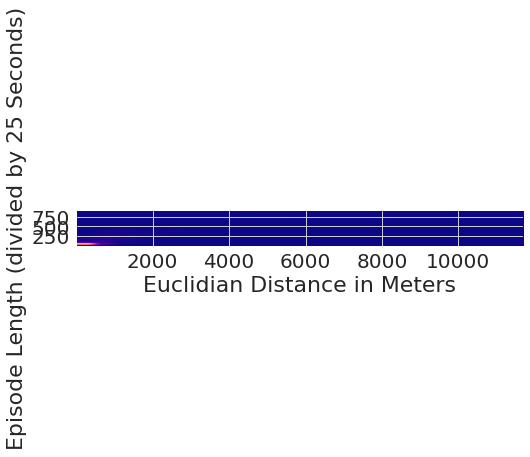

In [8]:
heatmap, xedges, yedges = np.histogram2d(runs[0]["mean_distance"], runs[0]["ep_length"],bins=25, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]


plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="plasma")
plt.xlabel("Euclidian Distance in Meters")
plt.ylabel("Episode Length (divided by 25 Seconds)")
plt.show()